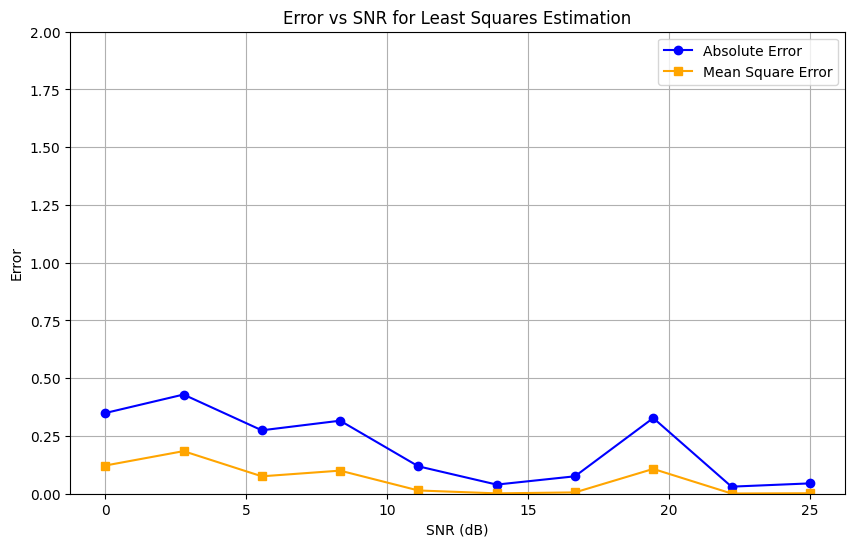

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator for reproducibility
np.random.seed(44)

# Parameters
N = 1
n = np.arange(N)  # Sample indices
h = np.ones(N)
A = 2.0  # True parameter

# SNR range in dB
snr_db = np.linspace(0, 25, 10)
errors = []
mean_square_errors = []

# Perform the experiment for different SNR values
for snr in snr_db:
    noise_power = 10 ** (-snr / 10)  # Convert SNR (dB) to linear scale
    w = np.random.normal(0, np.sqrt(noise_power), N)  # Gaussian noise
    x = A * h + w  # Observed signal

    # Least Squares Estimate of theta
    theta_ls = np.sum(x * h) / np.sum(h ** 2)

    # Compute the error
    error = np.abs(A - theta_ls)
    mse = (A - theta_ls) ** 2

    errors.append(error)
    mean_square_errors.append(mse)

# Plot Error and MSE vs SNR
plt.figure(figsize=(10, 6))
plt.plot(snr_db, errors, 'o-', label='Absolute Error', color='blue')
plt.plot(snr_db, mean_square_errors, 's-', label='Mean Square Error', color='orange')
plt.xlabel('SNR (dB)')
plt.ylabel('Error')
plt.title('Error vs SNR for Least Squares Estimation')
plt.ylim(0, A)  # Fix the y-axis range to [0, A]
plt.grid()
plt.legend()
plt.show()


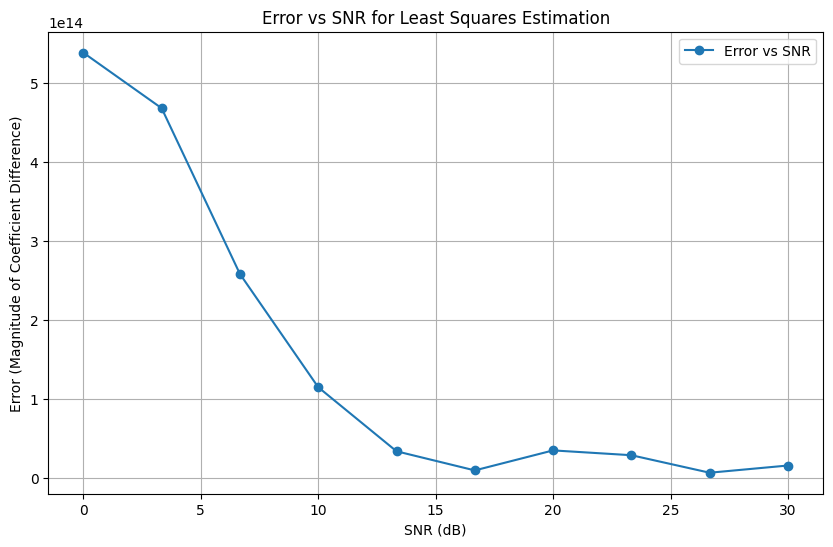

In [174]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f0 = 1  # Frequency
N = 10  # Number of samples
n = np.arange(N)  # Sample indices

# Generate basis functions
cos_basis = np.cos(2 * np.pi * f0 * n)
sin_basis = np.sin(2 * np.pi * f0 * n)


# True coefficients
true_a, true_b = 2, 3

# SNR range in dB
snr_db = np.linspace(0, 30, 10)
errors = []

# Perform the experiment for different SNR values
for snr in snr_db:
    # Generate the signal
    noise_power = 10 ** (-snr / 10)
    noise = np.random.normal(0, np.sqrt(noise_power), N)
    s = true_a * cos_basis + true_b * sin_basis + noise 
    X = np.column_stack((cos_basis, sin_basis))  # Design matrix
    # Least Squares Estimation
    X_transpose = X.T
    X_pseudo_inverse = np.linalg.inv(X_transpose @ X) @ X_transpose  # Pseudo-inverse of X
    coefficients = X_pseudo_inverse @ s  # Estimated coefficients
    estimated_a, estimated_b = coefficients

    # Compute error (absolute difference between true and estimated coefficients)
    error = np.sqrt((true_a - estimated_a) ** 2 + (true_b - estimated_b) ** 2)
    errors.append(error)

# Plot Error vs SNR
plt.figure(figsize=(10, 6))
plt.plot(snr_db, errors, 'o-', label='Error vs SNR')
plt.xlabel('SNR (dB)')
plt.ylabel('Error (Magnitude of Coefficient Difference)')
plt.title('Error vs SNR for Least Squares Estimation')
plt.grid()
plt.legend()
plt.show()
